In [3]:
#import modules
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [5]:
#load the dataset
df = pd.read_csv("C:/Users/user/Downloads/tweets.csv", encoding='ISO-8859-1')
df.head(10)

,Tweet,lable
0,@Vivekk303\nAny Sympathizers of these Anti -In...,1
1,#Hadith \n\n#ProphetMuhammad (PBUH) Said \n\nT...,1
2,#IslamicState Central issues an official photo...,1
3,#IslamicState (IS) Militants Targeted the #Ira...,1
4,Three Different #IslamicState (#Shabaab Cult) ...,1
5,This didn't bother lying Jew hater Cor-bin.ð...,1
6,IS-Sahel released photos of the attack carried...,1
7,#IslamicState (IS) Militants Counter an Attemp...,1
8,#IslamicState (IS) Militants Targeted the #Ira...,1
9,The official media of the #IslamicState publis...,1


In [7]:
columns_to_clean = ['Tweet', 'lable']
for column in columns_to_clean:
     # Check if the column is of object (string) type
    if df[column].dtype == 'object': 
        df[column] = df[column].str.replace('@', '').str.replace('#', '')
        df[column] = df[column].str.replace(r'https://t.co/\w+', '')

# Remove null values
df = df.dropna()
df.drop_duplicates(inplace = True)

# Print the cleaned DataFrame
print(df)

                                                  Tweet  lable
0     Vivekk303\nAny Sympathizers of these Anti -Ind...      1
1     Hadith \n\nProphetMuhammad (PBUH) Said \n\nThe...      1
2     IslamicState Central issues an official photos...      1
3     IslamicState (IS) Militants Targeted the Iraqi...      1
4     Three Different IslamicState (Shabaab Cult) Ce...      1
...                                                 ...    ...
9565  Ya esta bien! Pray for Bruselas.\nTodos estamo...      0
9567  StopIslam StopISIS PrayersForBrussels  JeSuisB...      0
9568  stopisis klinkt ook prima!!!!!!! https://t.co/...      0
9569  im not a muslim but that doesnt stop me from b...      0
9570                  StopISIS  https://t.co/RzSIaHbWlW      0

[9127 rows x 2 columns]


In [9]:
#Perform sentiment analysis using VADER
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['polarity'] = df['Tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['positive'] = df['Tweet'].apply(lambda x: sia.polarity_scores(x)['pos'])
df['negative'] = df['Tweet'].apply(lambda x: sia.polarity_scores(x)['neg'])
df['neutral'] = df['Tweet'].apply(lambda x: sia.polarity_scores(x)['neu'])

# Display result table format
result_df = df[['polarity', 'positive', 'negative', 'neutral']]
print(result_df)

      polarity  positive  negative  neutral
0      -0.8356     0.000     0.301    0.699
1       0.7906     0.200     0.000    0.800
2       0.0000     0.000     0.000    1.000
3      -0.6597     0.000     0.150    0.850
4       0.6249     0.151     0.000    0.849
...        ...       ...       ...      ...
9565    0.3802     0.178     0.000    0.822
9567    0.0000     0.000     0.000    1.000
9568    0.0000     0.000     0.000    1.000
9569    0.3252     0.135     0.000    0.865
9570    0.0000     0.000     0.000    1.000

[9127 rows x 4 columns]


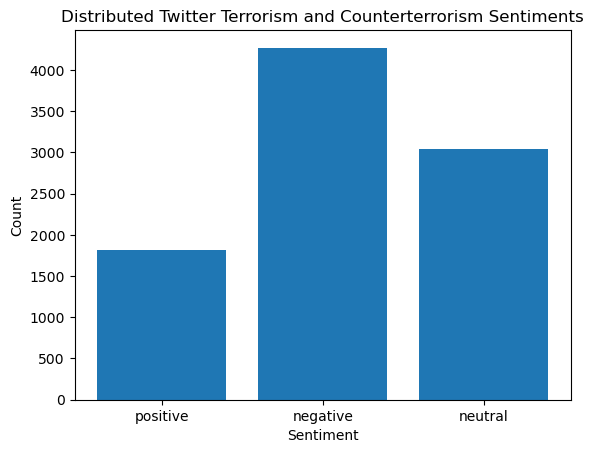

In [11]:
# Data for visualization
sentiments = ['positive', 'negative', 'neutral']
counts = [
    len(df[df['polarity'] > 0]),
    len(df[df['polarity'] < 0]),
    len(df[df['polarity'] == 0])
]

# Plotting the clustered column chart
plt.bar(sentiments, counts)
plt.title('Distributed Twitter Terrorism and Counterterrorism Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


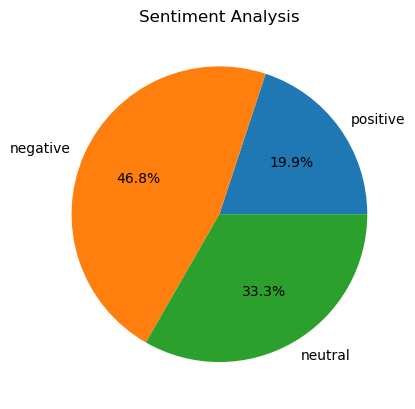

In [12]:
# Calculate the count of each sentiment category
sentiments = ['positive', 'negative', 'neutral']
counts = [
    len(result_df[result_df['polarity'] > 0]),
    len(result_df[result_df['polarity'] < 0]),
    len(result_df[result_df['polarity'] == 0])
]

# Create a pie chart
plt.pie(counts, labels=sentiments, autopct='%1.1f%%')

# Set title
plt.title('Sentiment Analysis')

# Show the chart
plt.show()